In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import norse.torch as nn

import rl # Init environment

In [2]:
env = gym.make("Gridworld-v0")

In [3]:
plt.figure(figsize=(12, 12))
env.reset()

array([177.7301325,   0.       ])

<Figure size 864x864 with 0 Axes>

In [16]:
def ask_network(observation, state=None):
    observation = torch.tensor(observation, dtype=torch.float32)
    action, state = model(observation, state)
    return action.detach().numpy(), state

linear = torch.nn.Linear(2, 2, bias=False)
model = nn.SequentialState(
    linear,
    nn.LICell()
).eval()

[0. 0.]
[-3.271623    0.30590874]


AssertionError: array([-3.271623  ,  0.30590874], dtype=float32) (<class 'numpy.ndarray'>) invalid

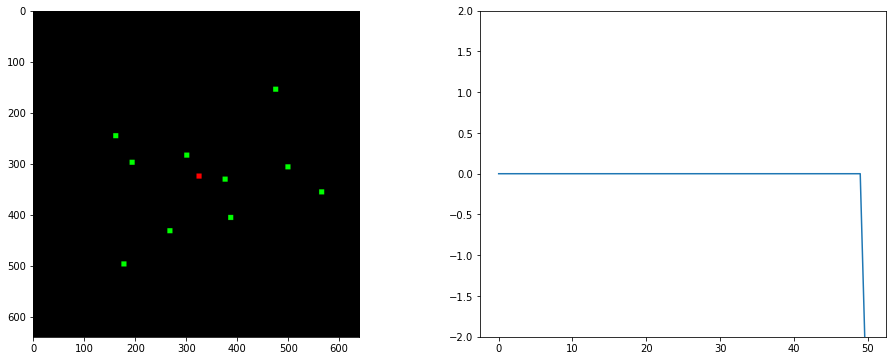

In [17]:

observation = env.reset()
state = None
is_done = False
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))
img = ax1.imshow(env.render(mode='rgb_array')) # only call this once
vs = [[0, 0]] * 50
while not is_done:
    img.set_data(env.render(mode='rgb_array')) # just update the data
    action, state = ask_network(observation, state)
    vs.append(state[-1].v.detach().numpy())
    ax2.clear()
    ax2.set_ylim(-2, 2)
    ax2.plot([x[0] for x in vs])
    if len(vs) > 49:
        vs = vs[1:]
    observation, _, is_done, _ = env.step(action)